 # StockPlot
 ### Jack Omohundro 2019 
 ***
 

In [2]:
import pandas as pd
import pandas_datareader as pdr

from datetime import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from math import isnan


from pandas.plotting import register_matplotlib_converters


 #### Object **StockPlot**
 ***
 

In [9]:
class StockPlot(object):
    
    def __init__(self, tkr, *argv):
        if (tkr==None):
            for arg in argv:
                self._df = arg
        else:
           
            self._df = pd.DataFrame(pdr.get_data_yahoo(tkr),columns=["Close"])
            self._df.index.name=dt.now().strftime("%m/%d/%y")
            self._df.columns = [tkr]
            self._tkr = tkr
        self.title = "Performance"
        
        
    def __add__(self, other):
        self._out = pd.concat([self._df,other._df],axis=1)
        self._out.index.name=dt.now().strftime("%m/%d/%y")
        
        return StockPlot(None,self._out)
    
    
    def __iadd__(self, other):
        self._df = pd.concat([self._df,other._df],axis=1)
        self._df.index.name=dt.now().strftime("%m/%d/%y")
        return self
        
    
    def tpDays(self,days):
        self._df = self._df[-days:]
        
        return self
    
    
    def setTitle(self, t):        
        self.title = t
        
        return self
    
    
    def savefig(self, path):
        plt.savefig(path, dpi=300)
        
    def clear(self):
        self.ax.clear()
        
    def plot(self, title,style="abs", **kwc):
        register_matplotlib_converters()    
        plt.style.use("ggplot")
        self.fig, self.ax = plt.subplots()      
        #self._df.plot(x="Dates", y=list(self._df.columns),title="TEST").set(xlabel="x label", ylabel="y label")

        if style == "rel":
            for x in self._df.columns:
                i = 0
                while isnan(self._df[x][i]):
                    i+=1
                self._df[x] = (self._df[x]/self._df[x][i]-1)*100
                plt.axhline(0,color="grey",linewidth=1.1)
        plt.plot(self._df,linewidth=1) #color="#1F3763"
        self.ax.xaxis.set_major_locator(plt.MaxNLocator(7))
        plt.xlabel("Date")
        if style == "rel":
            plt.ylabel("% Change")
        else:
            plt.ylabel("Price")
            
        plt.title(title)
        plt.legend(list(self._df.columns),loc="upper left")
        
        #ticks.append(str(dates[int(len(dates)-1)]))
        plt.xticks(rotation=15)
        plt.subplots_adjust(bottom=0.17)
        
        for key, flag in kwc.items():
            if (key=="path"):
                plt.savefig(flag, dpi=300)
            if (key=="wm"):
                plt.text(.13, .18, flag, fontsize=10, transform=plt.gcf().transFigure)
        
        return self
    
    
    def MA(self, ma):
        self._tmptkrs = pd.DataFrame()
        self._tmpma = pd.DataFrame()
        
        for x in self._df.columns:
            if(x[-2:]!="MA"):
                self._tmptkrs = pd.concat([self._tmptkrs,self._df[x]],axis=1)
                
            else:
                self._tmpma = pd.concat([self._tmpma,self._df[x]],axis=1)
                
        self._toadd = self._tmptkrs.rolling(window=ma).mean()
        self._toadd.columns=[x + str(ma) + "MA" for x in self._toadd.columns]
        self._tmpma = pd.concat([self._toadd],axis=1)
                  
        return StockPlot(None, pd.concat([self._tmpma],axis=1,sort=True))

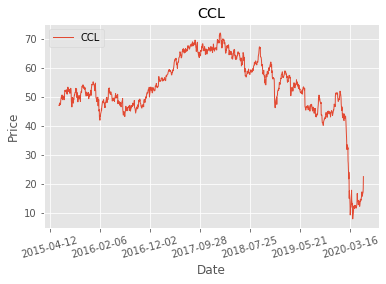

In [10]:
StockPlot("CCL").plot("CCL")